In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load the data, trade_id_conversion.csv and current_orders.csv
# trade_id_conversion = pd.read_csv('trade_id_conversion_5_10.csv')
current_orders = pd.read_csv('current_orders_5_24.csv')
current_orders_ms = pd.read_csv('current_orders_ms_5_24.csv')
# mt4_orders = pd.read_csv('orders_in_MT4_5_10.csv')

In [9]:
current_orders[current_orders['Entry Time'] >= '2024-05-20'].Profit.sum()

-925.8589278389538

In [10]:
current_orders_ms[current_orders_ms['Entry Time'] >= '2024-05-20'].Profit.sum()

-98.6437266434485

In [10]:
print(len(trade_id_conversion))
trade_id_conversion.head()

26


,Id,ticket
0,37,59845292
1,38,59846205
2,39,59846259
3,40,59846431
4,41,59846632


In [5]:
current_orders.head()

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,Profit,Margin,Fee,Closed
0,63,EURUSD,Buy,0.17,2024-05-10 13:00:00,1.07785,2024-05-10 18:00:00,1.07640,NaN,NaN,-25.33,183.2345,0.00004,False
1,62,EURUSD,Buy,0.69,2024-05-10 12:00:00,1.07797,2024-05-10 16:00:00,1.07872,219148.310747,219017.080747,50.37,743.7993,0.00002,True
2,61,EURUSD,Buy,1.23,2024-05-10 06:00:00,1.07759,2024-05-10 13:00:00,1.07785,219097.940747,219101.720747,29.52,1325.4357,0.00002,True
3,60,EURUSD,Buy,1.08,2024-05-10 01:00:00,1.07844,2024-05-10 08:00:00,1.07756,219068.420747,219020.690747,-98.28,1164.7152,0.00003,True
4,59,EURUSD,Buy,1.85,2024-05-09 17:00:00,1.07757,2024-05-10 04:00:00,1.07760,219166.700747,219169.430747,3.70,1993.5045,0.00001,True


In [6]:
# rename the Price.1 to closing_price, and Price to opening_price
mt4_orders_rn = mt4_orders.rename(columns={'Price.1': 'closing_price', 'Price': 'opening_price', 'Profit': 'actual_profit'})
# select just Ticket, Open Time, opening_price, closing_price, Close Time and actual_profit
mt4_orders_rn_sel = mt4_orders_rn[['Ticket', 'Open Time', 'opening_price','Close Time', 'closing_price', 'actual_profit']]
# make all the columns lowercase
mt4_orders_rn_sel.columns = map(str.lower, mt4_orders_rn_sel.columns)
mt4_orders_rn_sel.head()

,ticket,open time,opening_price,close time,closing_price,actual_profit
0,59840139,2024.05.06 17:00:02,1.07867,2024.05.06 17:05:03,1.07850,-0.17
1,59840275,2024.05.06 17:05:02,1.07852,2024.05.06 17:08:39,1.07837,-0.15
2,59841800,2024.05.06 18:00:01,1.07796,2024.05.06 19:00:04,1.07789,0.07
3,59843442,2024.05.06 19:00:03,1.07788,2024.05.06 19:51:31,1.07733,-0.55
4,59845292,2024.05.06 22:00:02,1.07747,2024.05.06 23:55:02,1.07696,-0.51


In [7]:
# merge current_orders with trade_id_conversion on the Id column 

merged = pd.merge(current_orders, trade_id_conversion, on='Id', how='inner')
# merge the result with mt4_orders_rn_sel on the ticket column
merged_w_mt4 = pd.merge(merged, mt4_orders_rn_sel, on='ticket', how='inner')
# round the Profit column to 2 decimal places
merged_w_mt4['Profit'] = merged_w_mt4['Profit'].round(2)
merged_w_mt4.head()

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,Profit,Margin,Fee,Closed,ticket,open time,opening_price,close time,closing_price,actual_profit
0,63,EURUSD,Buy,0.17,2024-05-10 13:00:00,1.07785,2024-05-10 18:00:00,1.07640,NaN,NaN,-25.33,183.2345,0.00004,False,59886172,2024.05.10 14:00:05,1.07786,2024.05.10 15:42:35,1.07686,-1.00
1,62,EURUSD,Buy,0.69,2024-05-10 12:00:00,1.07797,2024-05-10 16:00:00,1.07872,219148.310747,219017.080747,50.37,743.7993,0.00002,True,59885847,2024.05.10 13:00:03,1.07795,2024.05.10 15:42:04,1.07695,-1.00
2,61,EURUSD,Buy,1.23,2024-05-10 06:00:00,1.07759,2024-05-10 13:00:00,1.07785,219097.940747,219101.720747,29.52,1325.4357,0.00002,True,59884740,2024.05.10 07:00:05,1.07763,2024.05.10 14:00:06,1.07786,0.23
3,60,EURUSD,Buy,1.08,2024-05-10 01:00:00,1.07844,2024-05-10 08:00:00,1.07756,219068.420747,219020.690747,-98.28,1164.7152,0.00003,True,59884698,2024.05.10 02:00:02,1.07851,2024.05.10 05:11:21,1.07751,-1.00
4,59,EURUSD,Buy,1.85,2024-05-09 17:00:00,1.07757,2024-05-10 04:00:00,1.07760,219166.700747,219169.430747,3.70,1993.5045,0.00001,True,59876927,2024.05.09 18:00:04,1.07768,2024.05.09 23:55:02,1.07823,0.55


In [18]:
# create a new column called recalculated_profit which divides Profit by 200
merged_w_mt4.loc[:, 'recalculated_profit'] = merged_w_mt4['actual_profit']*(100*merged_w_mt4['Volume'])
# create a column that finds the difference between actual_profit and recalculated_profit
merged_w_mt4.loc[:, 'profit_difference'] = np.abs(merged_w_mt4['Profit']) - np.abs(merged_w_mt4['recalculated_profit'])
# create a column for the difference between the Entry Price and the opening_price
merged_w_mt4.loc[:, 'entry_difference'] = merged_w_mt4['Entry Price'] - merged_w_mt4['opening_price']
# create a column for the difference between the Exit Price and the closing_price
merged_w_mt4.loc[:, 'exit_difference'] = merged_w_mt4['Exit Price'] - merged_w_mt4['closing_price']
# filter out the rows where Exit Balance is null 
merged_w_mt4 = merged_w_mt4[~merged_w_mt4['Exit Balance'].isnull()]
# create a new column that is the absolute value of the difference column
merged_w_mt4.loc[:, 'profit_abs_difference'] = np.abs(merged_w_mt4['profit_difference'])
merged_w_mt4['profit_abs_difference'].describe()

count     25.000000
mean      22.066800
std       33.580241
min        0.270000
25%        1.530000
50%        3.800000
75%       28.160000
max      113.740000
Name: profit_abs_difference, dtype: float64

In [23]:
# save merged_w_mt4 to a csv file
merged_w_mt4.to_csv('merged_w_mt4_5_10.csv', index=False)

In [19]:
merged_w_mt4['entry_difference'].describe()

count    25.000000
mean     -0.000021
std       0.000042
min      -0.000110
25%      -0.000050
50%      -0.000020
75%       0.000010
max       0.000080
Name: entry_difference, dtype: float64

In [20]:
# filter to just where the entry difference is -0.00014
merged_w_mt4[merged_w_mt4['entry_difference'] <= -0.000110]

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,...,open time,opening_price,close time,closing_price,actual_profit,recalculated_profit,profit_difference,entry_difference,exit_difference,profit_abs_difference
4,59,EURUSD,Buy,1.85,2024-05-09 17:00:00,1.07757,2024-05-10 04:00:00,1.0776,219166.700747,219169.430747,...,2024.05.09 18:00:04,1.07768,2024.05.09 23:55:02,1.07823,0.55,101.75,-98.05,-0.00011,-0.00063,98.05


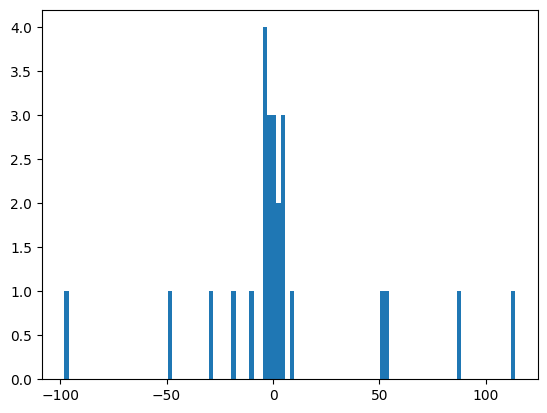

In [22]:
# plot the distribution of the the difference column
plt.hist(merged_w_mt4['profit_difference'], bins=100)
plt.show()


In [28]:
merged_w_mt4.loc[:, ['Profit', 'recalculated_profit', 'difference', 'abs_difference']]

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Exit Balance,Exit Equity,...,Closed,ticket,open time,opening_price,close time,closing_price,actual_profit,recalculated_profit,difference,abs_difference
2,116,EURUSD,Sell,2.00,2024-05-03 22:35:00,1.07686,2024-05-03 22:50:00,1.07658,218439.901373,218463.901373,...,True,59834311,2024.05.03 22:40:02,1.07684,2024.05.03 22:55:02,1.07661,0.23,46.0,2.0,2.0
3,115,EURUSD,Buy,2.00,2024-05-03 22:30:00,1.07687,2024-05-03 22:35:00,1.07686,218391.901373,218367.901373,...,True,59834214,2024.05.03 22:35:03,1.07690,2024.05.03 22:40:03,1.07686,-0.04,-8.0,-2.0,2.0
4,114,EURUSD,Sell,2.00,2024-05-03 22:25:00,1.07689,2024-05-03 22:30:00,1.07687,218401.901373,218371.901373,...,True,59834164,2024.05.03 22:30:02,1.07688,2024.05.03 22:35:04,1.07692,-0.04,-8.0,8.0,8.0
5,112,EURUSD,Sell,2.00,2024-05-03 22:00:00,1.07681,2024-05-03 22:25:00,1.07689,218401.901373,218431.901373,...,True,59833907,2024.05.03 22:05:02,1.07679,2024.05.03 22:30:03,1.07690,-0.11,-22.0,2.0,2.0
6,111,EURUSD,Buy,2.00,2024-05-03 21:55:00,1.07674,2024-05-03 22:00:00,1.07681,218421.901373,218421.901373,...,True,59833860,2024.05.03 22:00:02,1.07676,2024.05.03 22:05:04,1.07679,0.03,6.0,0.0,0.0
7,110,EURUSD,Sell,2.00,2024-05-03 21:50:00,1.07661,2024-05-03 22:00:00,1.07681,218415.901373,218421.901373,...,True,59833818,2024.05.03 21:55:03,1.07662,2024.05.03 22:05:03,1.07682,-0.20,-40.0,-4.0,4.0
8,109,EURUSD,Buy,2.00,2024-05-03 21:40:00,1.07663,2024-05-03 21:50:00,1.07661,218459.901373,218495.901373,...,True,59833723,2024.05.03 21:45:04,1.07665,2024.05.03 21:55:04,1.07662,-0.03,-6.0,0.0,0.0
9,108,EURUSD,Buy,2.00,2024-05-03 21:35:00,1.07660,2024-05-03 21:50:00,1.07661,218465.901373,218495.901373,...,True,59833655,2024.05.03 21:40:02,1.07663,2024.05.03 21:55:04,1.07662,-0.01,-2.0,0.0,0.0
10,106,EURUSD,Sell,2.00,2024-05-03 21:20:00,1.07659,2024-05-03 21:40:00,1.07663,218467.901373,218469.901373,...,True,59833233,2024.05.03 21:25:04,1.07661,2024.05.03 21:45:04,1.07665,-0.04,-8.0,-2.0,2.0
11,107,EURUSD,Buy,2.00,2024-05-03 21:30:00,1.07667,2024-05-03 21:35:00,1.07660,218477.901373,218473.901373,...,True,59833525,2024.05.03 21:35:24,1.07669,2024.05.03 21:40:04,1.07661,-0.08,-16.0,0.0,0.0
